## Preparation

In [3]:
from IPython.display import display  # <-- TAMBAHKAN BARIS INI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Memulai Skrip Perhitungan Isu (Rule-Based) ---")

--- Memulai Skrip Perhitungan Isu (Rule-Based) ---


In [4]:
file_path = '../Dataset/Bert_Sentimen.csv'
df = pd.read_csv(file_path)
display(df.head())

,created_at,full_text,lang,cleaned_text,normalized_text,dominant_topic,sentiment_pred
0,2025-10-21,@salam4jari Mentri gagal mentri ESDM yg merusa...,in,mentri gagal mentri esdm yg merusak sdm itu se...,menteri gagal menteri esdm yang merusak sdm it...,1,Negatif
1,2025-10-20,@feroferraferri Cuman mediator atau bahasa ker...,in,cuman mediator atau bahasa kerennya calo masa ...,cuman mediator atau bahasa kerennya calo masa ...,1,Negatif
2,2025-10-19,mentri sdm yang bener cuman kak imel doang anjjj,in,mentri sdm yang bener cuman kak imel doang anjjj,menteri sdm yang bener cuman kak imel doang anjjj,2,Negatif
3,2025-10-18,@DS_yantie Mentri sdm kok gk punya otak,in,mentri sdm kok gk punya otak,menteri sdm kok gak punya otak,1,Negatif
4,2025-10-18,@somexthread Kitab suci dihina cuma bisa nyuru...,in,kitab suci dihina cuma bisa nyuruh sabar kader...,kitab suci dihina cuma bisa nyuruh sabar kader...,1,Negatif


In [5]:
# ...
# Hapus URL
df['normalized_text'] = df['normalized_text'].str.replace(r'http\S+|www\S+', '', regex=True)
# TAMBAHKAN INI: Hapus artefak HTML
df['normalized_text'] = df['normalized_text'].str.replace(r'&amp;', ' ', regex=True)
# Hapus Mention
df['normalized_text'] = df['normalized_text'].str.replace(r'@\w+', '', regex=True)
# ...

In [6]:
df_filter = df[['created_at', 'normalized_text', 'sentiment_pred']]
display(df_filter.tail())

,created_at,normalized_text,sentiment_pred
5678,2024-10-24,meme bahlil pokoknya gue retweet terus sampe d...,Negatif
5679,2024-10-24,meme bahlil lucu smua,Positif
5680,2024-10-24,wkwkwk luculucu banget wey meme bahlil,Positif
5681,2024-10-24,bahlil ini mukanya mirip meme apa ya gak asing,Negatif
5682,2024-10-24,full meme kalau ada bahlil tu haha,Netral


In [7]:
df_filter['created_at'] = pd.to_datetime(df_filter['created_at'])

start_date = '2025-01-01'
end_date = '2025-12-31'

df_fix = df_filter[(df_filter['created_at'] >= start_date) & (df_filter['created_at'] <= end_date)]

display(df_fix.head())

C:\Users\faiqa\AppData\Local\Temp\ipykernel_23612\3189792891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['created_at'] = pd.to_datetime(df_filter['created_at'])


,created_at,normalized_text,sentiment_pred
0,2025-10-21,menteri gagal menteri esdm yang merusak sdm it...,Negatif
1,2025-10-20,cuman mediator atau bahasa kerennya calo masa ...,Negatif
2,2025-10-19,menteri sdm yang bener cuman kak imel doang anjjj,Negatif
3,2025-10-18,menteri sdm kok gak punya otak,Negatif
4,2025-10-18,kitab suci dihina cuma bisa nyuruh sabar kader...,Negatif


In [8]:
display(df_fix.tail())

,created_at,normalized_text,sentiment_pred
5641,2025-03-23,emg cherry picking coba ada gak yang belain ka...,Negatif
5642,2025-03-23,dri dulu aku selalu bingung kenapa sih orangor...,Negatif
5643,2025-03-22,send meme bahlil ke dia nder,Netral
5644,2025-03-21,karna kamu kasih meme bahlil mari kita mutualan,Netral
5645,2025-03-15,meme tentang bahlil kocak semua yak,Netral


# Configuration

In [9]:
print("\n--- 1. Menentukan Daftar Kata Kunci untuk 3 Isu ---")

# Kita gunakan kata-kata yang sudah di-normalisasi (TAPI BELUM distem)
# Ini penting agar kata kuncinya masih bisa dibaca manusia
# (Gunakan kata-kata dari skrip LDA Anda yang gagal, tapi logis)

# Dari hasil LDA Topik #2 yang sukses, dan tambahan
keywords_meme = [
    'meme', 'lapor', 'penjara', 'polisi', 'satir',
    'hina', 'repost', 'lucu', 'akun'
]

# (Kita harus menebak ini, karena LDA gagal menemukannya)
keywords_lpg = [
    'lpg', 'gas', 'langka', 'sulit', 'antri', 'subsidi',
    'elpiji', 'tabung'
]

# (Kita harus menebak ini, karena LDA gagal menemukannya)
keywords_tambang = [
    'tambang', 'izin', 'wadas', 'papua', 'ampat', 'raja',
    'iup', 'konsesi', 'nikel' # tambang nikel sering terkait
]

print(f"Isu Meme: {keywords_meme}")
print(f"Isu LPG: {keywords_lpg}")
print(f"Isu Tambang: {keywords_tambang}")


--- 1. Menentukan Daftar Kata Kunci untuk 3 Isu ---
Isu Meme: ['meme', 'lapor', 'penjara', 'polisi', 'satir', 'hina', 'repost', 'lucu', 'akun']
Isu LPG: ['lpg', 'gas', 'langka', 'sulit', 'antri', 'subsidi', 'elpiji', 'tabung']
Isu Tambang: ['tambang', 'izin', 'wadas', 'papua', 'ampat', 'raja', 'iup', 'konsesi', 'nikel']


In [10]:
print("\n--- 2. Melakukan kategorisasi cuitan... ---")

# Buat fungsi untuk mengecek kata kunci
# Kita akan menggunakan 'set' untuk pencarian yang sangat cepat
set_meme = set(keywords_meme)
set_lpg = set(keywords_lpg)
set_tambang = set(keywords_tambang)

def tentukan_isu(text):
    # Ubah teks cuitan menjadi set kata-kata
    try:
        words = set(text.split())
    except AttributeError:
        return 'Tidak Ada Isu' # Jika text bukan string (misal NaN)

    # Cek irisan (intersection)
    # Cek dalam urutan prioritas jika ada tumpang tindih (sesuaikan jika perlu)

    # .isdisjoint() -> True jika TIDAK ada irisan.
    # jadi `not .isdisjoint()` -> True jika ADA irisan

    is_meme = not words.isdisjoint(set_meme)
    is_lpg = not words.isdisjoint(set_lpg)
    is_tambang = not words.isdisjoint(set_tambang)

    # Buat label
    labels = []
    if is_meme:
        labels.append('Isu Meme')
    if is_lpg:
        labels.append('Isu LPG')
    if is_tambang:
        labels.append('Isu Tambang')

    # Tentukan hasil
    if len(labels) == 0:
        return 'Isu Lain / Spam'
    elif len(labels) == 1:
        return labels[0]
    else:
        # Jika satu cuitan membahas 2 isu (misal Meme & Tambang)
        return 'Isu Tumpang Tindih'

# Terapkan fungsi ke setiap baris di DataFrame
df_fix['isu_teridentifikasi'] = df_fix['normalized_text'].apply(tentukan_isu)

print("Selesai melakukan kategorisasi.")


--- 2. Melakukan kategorisasi cuitan... ---
Selesai melakukan kategorisasi.


C:\Users\faiqa\AppData\Local\Temp\ipykernel_23612\4284468949.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fix['isu_teridentifikasi'] = df_fix['normalized_text'].apply(tentukan_isu)



--- 3. Hasil Perhitungan Isu Dominan ---
isu_teridentifikasi
Isu Lain / Spam       3483
Isu Meme              1882
Isu Tambang             62
Isu Tumpang Tindih      37
Isu LPG                 30
Name: count, dtype: int64


C:\Users\faiqa\AppData\Local\Temp\ipykernel_23612\3252582729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Plot telah disimpan ke distribusi_isu_dominan.png
--- Skrip Selesai ---


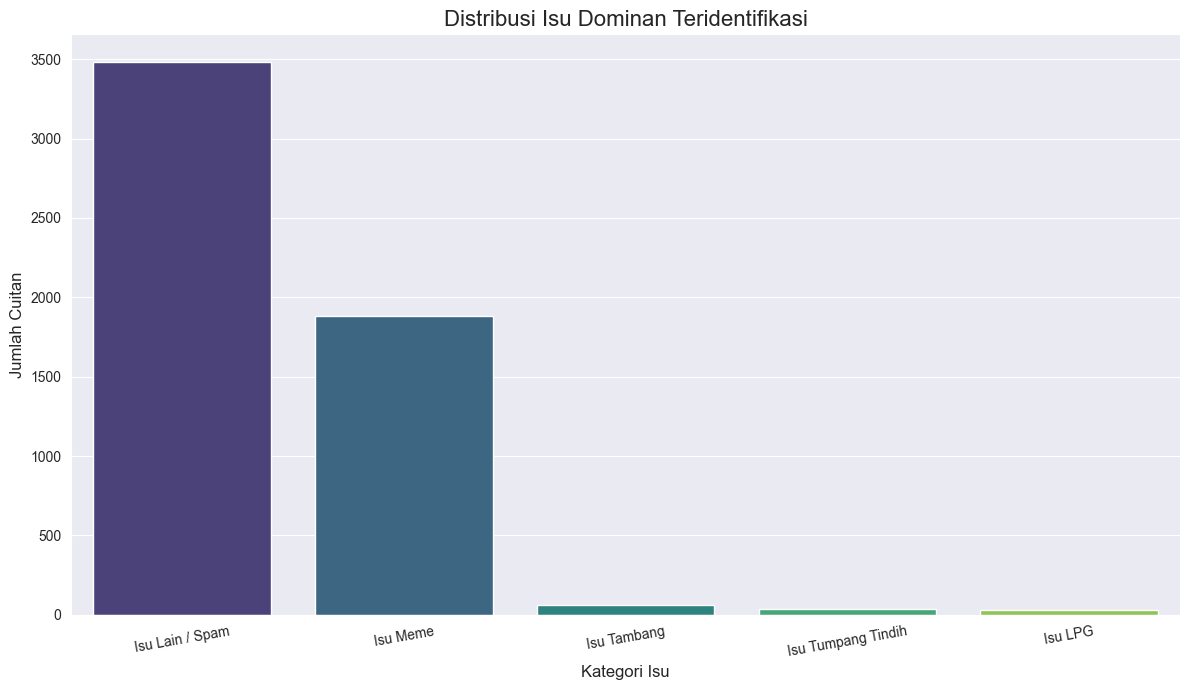

In [11]:
print("\n--- 3. Hasil Perhitungan Isu Dominan ---")

# Hitung jumlah untuk setiap kategori
hasil_hitungan = df_fix['isu_teridentifikasi'].value_counts()

print(hasil_hitungan)

# --- Visualisasi ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x=hasil_hitungan.index,
    y=hasil_hitungan.values,
    palette='viridis'
)
plt.title('Distribusi Isu Dominan Teridentifikasi', fontsize=16)
plt.ylabel('Jumlah Cuitan', fontsize=12)
plt.xlabel('Kategori Isu', fontsize=12)
plt.xticks(rotation=10)
nama_file_plot = 'distribusi_isu_dominan.png'
plt.savefig(nama_file_plot)
plt.tight_layout()

print(f"\nPlot telah disimpan ke {nama_file_plot}")
print("--- Skrip Selesai ---")

In [12]:
df_fix.head()

,created_at,normalized_text,sentiment_pred,isu_teridentifikasi
0,2025-10-21,menteri gagal menteri esdm yang merusak sdm it...,Negatif,Isu Lain / Spam
1,2025-10-20,cuman mediator atau bahasa kerennya calo masa ...,Negatif,Isu Lain / Spam
2,2025-10-19,menteri sdm yang bener cuman kak imel doang anjjj,Negatif,Isu Lain / Spam
3,2025-10-18,menteri sdm kok gak punya otak,Negatif,Isu Lain / Spam
4,2025-10-18,kitab suci dihina cuma bisa nyuruh sabar kader...,Negatif,Isu Lain / Spam


# Final

In [13]:
import pandas as pd
import os
import sys

In [14]:
# Pergi 'naik satu level' (keluar dari 'Rule Bases') lalu masuk ke 'Dataset'
output_dir = '../Dataset'
output_filename = 'Data-Bersih-Untuk-BERT.csv'

# Ini akan menggabungkan path menjadi: '../Dataset/Data-Bersih-Untuk-BERT.csv'
output_path = os.path.join(output_dir, output_filename)

In [15]:
# --- 2. Buat Direktori 'Dataset' jika belum ada ---
os.makedirs(output_dir, exist_ok=True)
print(f"Direktori output dipastikan ada di: '{output_dir}/'")

Direktori output dipastikan ada di: '../Dataset/'


In [16]:
print("\n--- Memfilter Data Spam ---")
jumlah_awal = len(df_fix)
print(f"Jumlah data awal: {jumlah_awal}")


--- Memfilter Data Spam ---
Jumlah data awal: 5494


In [17]:
df_fix = df_fix[df_fix['isu_teridentifikasi'] != 'Isu Lain / Spam'].copy()

jumlah_bersih = len(df_fix)
jumlah_dibuang = jumlah_awal - jumlah_bersih

print(f"Jumlah spam/noise dibuang: {jumlah_dibuang}")
print(f"Jumlah data bersih tersisa: {jumlah_bersih}")

Jumlah spam/noise dibuang: 3483
Jumlah data bersih tersisa: 2011


In [18]:
print("\n--- Menyimpan Data Bersih ---")

# Pilih hanya kolom yang Anda inginkan
kolom_yang_diinginkan = ['created_at', 'normalized_text', 'isu_teridentifikasi', 'sentiment_pred']
df_final_untuk_bert = df_fix[kolom_yang_diinginkan]
display(df_final_untuk_bert)




--- Menyimpan Data Bersih ---


,created_at,normalized_text,isu_teridentifikasi,sentiment_pred
41,2025-08-15,ya beda blok jaman moh hatta jadi wapres indon...,Isu LPG,Negatif
50,2025-07-04,knp ini menteri gak mengundurkan diri cuma uta...,Isu Tambang,Negatif
57,2025-06-25,pak punya menteri kok gini banget pak ngawur l...,Isu Tambang,Negatif
71,2025-04-18,wakil menteri leveeeeel receeeeh level jalanan...,Isu Meme,Negatif
81,2025-03-26,klw berargumen itu emang kerjaan pemerintah ya...,Isu LPG,Negatif
...,...,...,...,...
5641,2025-03-23,emg cherry picking coba ada gak yang belain ka...,Isu Meme,Negatif
5642,2025-03-23,dri dulu aku selalu bingung kenapa sih orangor...,Isu Meme,Negatif
5643,2025-03-22,send meme bahlil ke dia nder,Isu Meme,Netral
5644,2025-03-21,karna kamu kasih meme bahlil mari kita mutualan,Isu Meme,Netral


In [19]:
df_final_untuk_bert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 41 to 5645
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           2011 non-null   datetime64[ns]
 1   normalized_text      2011 non-null   object        
 2   isu_teridentifikasi  2011 non-null   object        
 3   sentiment_pred       2011 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 78.6+ KB


In [20]:
os.makedirs(output_dir, exist_ok=True)

# Simpan file ke lokasi yang benar
df_final_untuk_bert.to_csv(output_path, index=False)

print(f"BERHASIL: Data bersih (hanya 3 kolom) telah disimpan ke:")
print(f"{output_path}")

BERHASIL: Data bersih (hanya 3 kolom) telah disimpan ke:
../Dataset\Data-Bersih-Untuk-BERT.csv


# Visualisasi Akhir

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mengatur style plot agar terlihat rapi
sns.set(style="whitegrid")
print("Libraries berhasil dimuat.")

Libraries berhasil dimuat.


In [22]:
# Path ini 'naik satu level' dari 'Rule Bases' lalu masuk ke 'Dataset'
file_path = '../Dataset/Data-Bersih-Untuk-BERT.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Berhasil memuat {len(df)} baris data bersih dari: {file_path}")

    # Sangat penting untuk visualisasi waktu
    df['created_at'] = pd.to_datetime(df['created_at'])

    print("\nInfo Data:")
    df.info()

    print("\nContoh Data:")
    print(df.head())

    print("\nDistribusi Isu (untuk dicek):")
    print(df['isu_teridentifikasi'].value_counts())

except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{file_path}'")
    print("Pastikan path Anda sudah benar.")

Berhasil memuat 2011 baris data bersih dari: ../Dataset/Data-Bersih-Untuk-BERT.csv

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           2011 non-null   datetime64[ns]
 1   normalized_text      2011 non-null   object        
 2   isu_teridentifikasi  2011 non-null   object        
 3   sentiment_pred       2011 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 63.0+ KB

Contoh Data:
  created_at                                    normalized_text  \
0 2025-08-15  ya beda blok jaman moh hatta jadi wapres indon...   
1 2025-07-04  knp ini menteri gak mengundurkan diri cuma uta...   
2 2025-06-25  pak punya menteri kok gini banget pak ngawur l...   
3 2025-04-18  wakil menteri leveeeeel receeeeh level jalanan...   
4 2025-03-26  klw berargumen itu emang kerjaan p

Membuat Visualisasi #1: Bar Chart Isu Dominan...


C:\Users\faiqa\AppData\Local\Temp\ipykernel_23612\518578794.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Plot telah disimpan ke: distribusi_isu_relevan.png


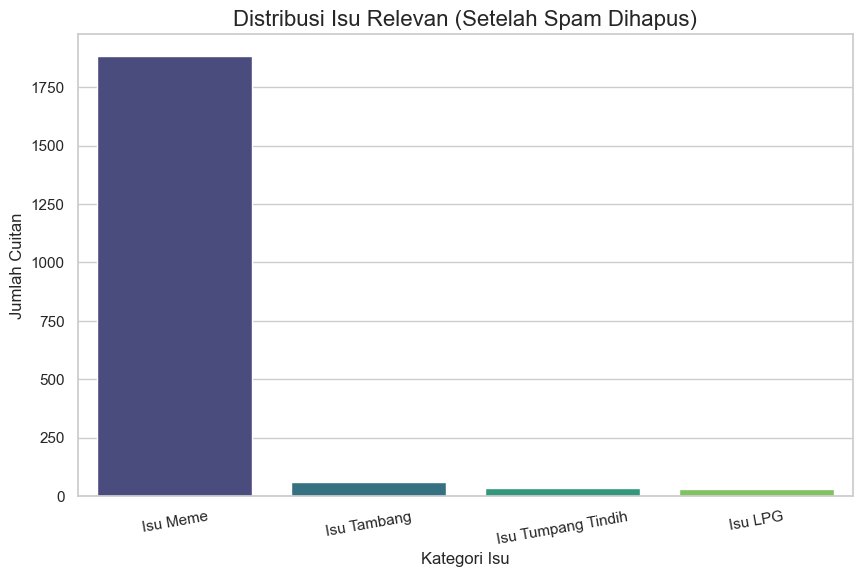

In [23]:
print("Membuat Visualisasi #1: Bar Chart Isu Dominan...")

# Hitung jumlah untuk setiap kategori
issue_counts = df['isu_teridentifikasi'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=issue_counts.index,
    y=issue_counts.values,
    palette='viridis' # Anda bisa ganti palet warna
)

plt.title('Distribusi Isu Relevan (Setelah Spam Dihapus)', fontsize=16)
plt.ylabel('Jumlah Cuitan', fontsize=12)
plt.xlabel('Kategori Isu', fontsize=12)
plt.xticks(rotation=10)

# Simpan file plot
output_plot_path = 'distribusi_isu_relevan.png'
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')

print(f"Plot telah disimpan ke: {output_plot_path}")
plt.show()


Membuat Visualisasi #2: Akumulasi Isu dari Waktu ke Waktu...

Data yang diagregasi per waktu (5 baris pertama):
isu_teridentifikasi  Isu LPG  Isu Meme  Isu Tambang  Isu Tumpang Tindih
created_at                                                             
2025-02-04                 1         0            0                   0
2025-02-05                 1         0            0                   0
2025-02-10                 1         0            0                   0
2025-02-14                 1         0            0                   0
2025-03-15                 0         1            0                   0

Plot waktu telah disimpan ke: akumulasi_isu_waktu.png


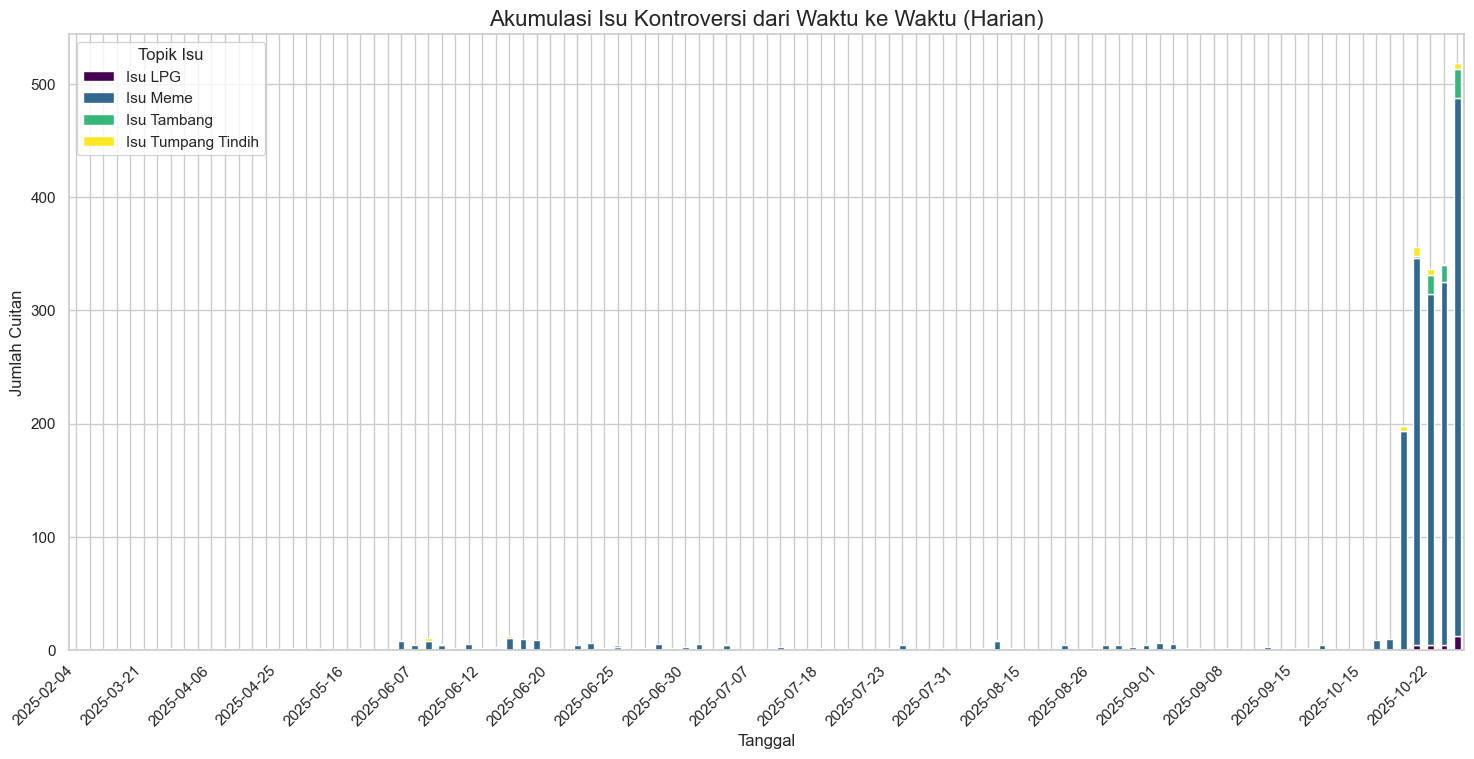

In [24]:
print("\nMembuat Visualisasi #2: Akumulasi Isu dari Waktu ke Waktu...")

# Agregasi data: Hitung jumlah cuitan PER HARI PER ISU
# 'D' = Harian (Daily). Anda bisa ganti ke 'W' (Weekly) jika plot terlalu padat
df_time_grouped = df.groupby(
    [pd.Grouper(key='created_at', freq='D'), 'isu_teridentifikasi']
).size().unstack(fill_value=0)

print("\nData yang diagregasi per waktu (5 baris pertama):")
print(df_time_grouped.head())

# Buat plot
# 'kind='bar', stacked=True' adalah kuncinya
df_time_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 8), # Ukuran besar agar mudah dibaca
    colormap='viridis' # Gunakan palet warna yang sama
)

plt.title('Akumulasi Isu Kontroversi dari Waktu ke Waktu (Harian)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Cuitan', fontsize=12)
plt.legend(title='Topik Isu')

# Mengatur label sumbu-x agar tidak tumpang tindih
ax = plt.gca()

# Tampilkan label tanggal setiap 5 hari saja (agar tidak padat)
xticklabels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([
    label.split(' ')[0] if i % 5 == 0 else '' for i, label in enumerate(xticklabels)
], rotation=45, ha='right')


# Simpan file plot
output_plot_path_time = 'akumulasi_isu_waktu.png'
plt.savefig(output_plot_path_time, dpi=300, bbox_inches='tight')

print(f"\nPlot waktu telah disimpan ke: {output_plot_path_time}")
plt.show()


Membuat Visualisasi #3: Word Cloud per Isu...
Sedang memproses Word Cloud untuk: Isu LPG...
  - Disimpan ke: wordcloud_isu_lpg.png


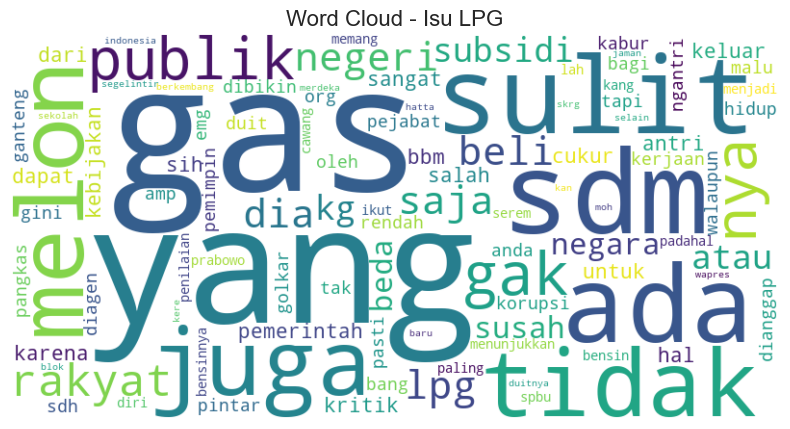

Sedang memproses Word Cloud untuk: Isu Tambang...
  - Disimpan ke: wordcloud_isu_tambang.png


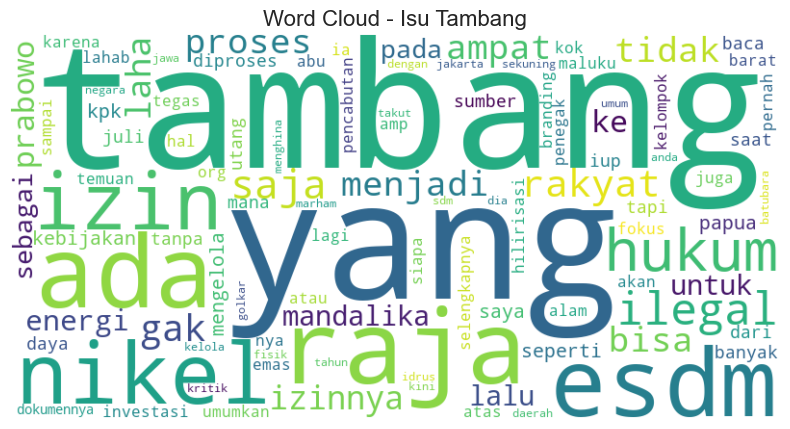

Sedang memproses Word Cloud untuk: Isu Meme...
  - Disimpan ke: wordcloud_isu_meme.png


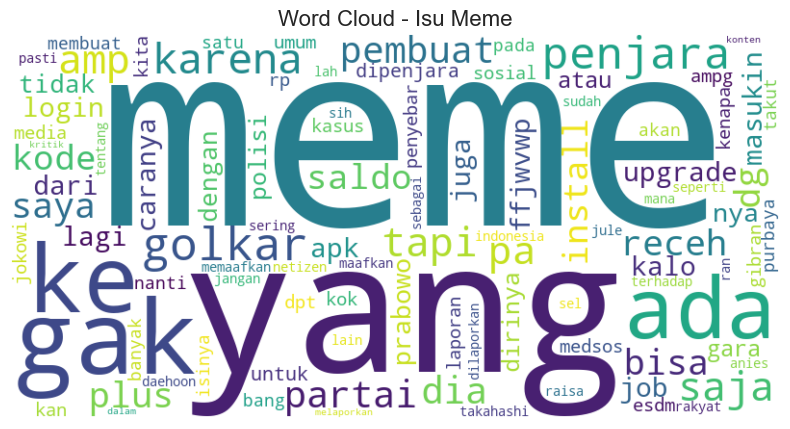

Sedang memproses Word Cloud untuk: Isu Tumpang Tindih...
  - Disimpan ke: wordcloud_isu_tumpang_tindih.png


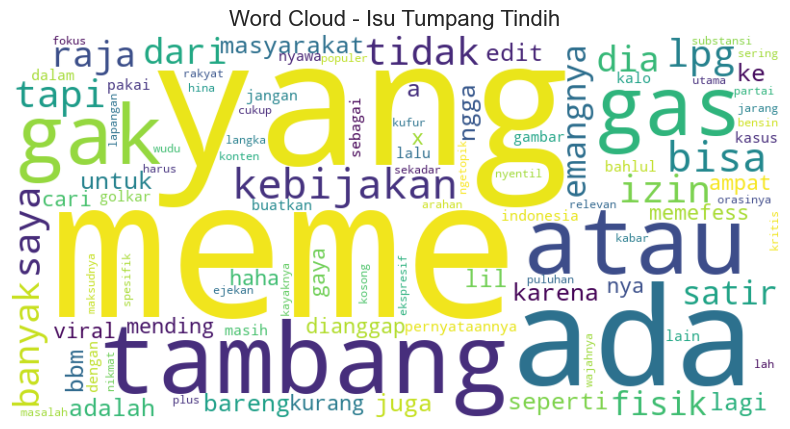


--- Selesai Membuat Semua Word Cloud ---


In [25]:
# --- TAMBAHAN: VISUALISASI WORD CLOUD PER ISU ---
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("\nMembuat Visualisasi #3: Word Cloud per Isu...")

# 1. Definisi Stopwords (Agar Word Cloud Bersih)
# Kita gabungkan stopwords umum dan stopwords konteks spesifik yang sudah kita temukan
stopwords_konteks = set([
    # Tokoh/Nama
    'menteri', 'bahlil', 'lahadalia', 'pak', 'bpk',

    # Slang / Noise Percakapan Umum
    'jadi', 'sama', 'si', 'udah', 'mau', 'kalau', 'banget', 'semua', 'jelek',
    'lu', 'orang', 'lebih', 'gue', 'gw', 'buat', 'bikin', 'muka', 'aku',
    'bukan', 'masuk', 'apa', 'kamu', 'kaya', 'lucu', 'suka', 'soal', 'punya',
    'cuma', 'kayak', 'pake', 'malah', 'coba', 'kerja', 'baik', 'kak', 'makin',
    'kek', 'liat', 'terus', 'mirip', 'gua', 'wajah', 'biar', 'emang', 'yg', 'ya', 'ini', 'itu', 'dan', 'di',

    # Noise Spesifik (Spam/Bot yang mungkin tersisa dalam teks)
    'akun', 'ketua', 'repost', 'isi', 'maaf', 'foto', 'zonauang', 'promo',
    'shopee', 'spay', 'diskon', 'ffjwvp', 'referral', 'shopeepay', 'FFJWVP', 'freelance'
])

# 2. Loop untuk setiap Isu Unik
unique_issues = df['isu_teridentifikasi'].unique()

for issue in unique_issues:
    # Lewati jika isu kosong atau NaN
    if pd.isna(issue) or issue == "":
        continue

    print(f"Sedang memproses Word Cloud untuk: {issue}...")

    # Filter data hanya untuk isu tersebut
    df_isu = df[df['isu_teridentifikasi'] == issue]

    # Gabungkan semua teks menjadi satu string besar
    # Pastikan konversi ke string untuk menghindari error jika ada nilai bukan string
    text_combined = " ".join(df_isu['normalized_text'].astype(str).tolist())

    if not text_combined.strip():
        print(f"  - Tidak ada teks untuk {issue}, dilewati.")
        continue

    # Buat Word Cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords_konteks, # Gunakan filter stopwords kita
        colormap='viridis',
        max_words=100,
        collocations=False # Hindari duplikasi kata ganda
    ).generate(text_combined)

    # Tampilkan Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {issue}', fontsize=16)

    # Simpan ke file gambar
    filename = f"wordcloud_{issue.lower().replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"  - Disimpan ke: {filename}")

    plt.show()
    plt.close()

print("\n--- Selesai Membuat Semua Word Cloud ---")